In [27]:
#^^^^^^^^^^^^^^^^^^^^^^^^^^
# Name: Jonah Zembower
# Date: February 5, 2025
# Project: Harvard Research Study on Postural Stability During Heart Catheterization Surgeries
#^^^^^^^^^^^^^^^^^^^^^^^^^^

# Import Libraries and Data:

#### Importing Libraries:

In [28]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

#### Importing Data:

In [29]:
# File paths for all pertinent CSVs
file_paths = {
    "Time_00" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_00.csv",
    "Time_01" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_01.csv",
    "Time_02" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_02.csv",
    "Time_03" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_03.csv",
    "Time_04" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_04.csv",
    "Time_05" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_05.csv",
    "Time_06" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_06.csv",
    "Time_07" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_07.csv",
    "Time_08" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_08.csv",
    "Time_09" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_09.csv",
    "Time_10" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_10.csv",
    "Mean" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG Percentages\\Mean.csv",
    "Peak" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG Percentages\\Peak.csv",
    "Variability" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG Percentages\\Variability.csv",
}

# Read each CSV into a DataFrame
csv_data = {name: pd.read_csv(path) for name, path in file_paths.items()}

In [30]:
# Load in the data
survey_data = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\survey.csv')

# File paths for all pertinent CSVs
file_paths_surveys = {
    "case_with_dummy": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\survey.csv",
    "case_data" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\CASEDATA_RAMPART_WITH LABELS.csv",
    "survey_data": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\BASELINESURVEY_RAMPART_WITH LABELS.csv",
    "discomfort_data": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\DISCOMFORT SURVEY.csv"
}

# Read each CSV into a DataFrame
csv_data_surveys = {name: pd.read_csv(path) for name, path in file_paths_surveys.items()}

#### Indexes:

In [31]:
# Set the index for the lead subjects
subject_ids_lead = [
 '1_001', '2_001', '4_001', '2_002', '3_002', 
    '1_003', '2_003', '4_003',             
    '1_004', '3_005', '5_005', '1_006',
    '2_006', '1_007', '2_007', '2_008', '3_008',
    '2_019', '3_019', '1_020','2_020', '1_021','2_021',
    '1_022', '4_022', '1_023',
    '2_023', '1_024','2_024', '1_026', '2_026','1_027','2_027',
    '1_028', '2_028', '1_029', '2_029',
    '2_030', '3_030', '2_031'
]
# Set the index for the rampart subjects
subject_ids_rampart = [
    '6_001', '1_002',
    '4_002', '3_004', '4_004', '1_005', '4_005',
    '3_006', '4_006', '3_007', '4_007', '1_008',
    '4_008', '1_019', '4_019', '2_022', '3_022', '4_023',
    '1_030', '1_031'
]
# Index for each CSV file:
index = [
    '1_001','2_001','4_001','6_001', '1_002', '2_002', '3_002', '4_002',
    '1_003','2_003','4_003','1_004','3_004','4_004',
    '1_005','3_005','4_005','5_005','1_006', 
    '2_006', '3_006', '4_006', '1_007', '2_007',
      '3_007', '4_007', '1_008', '2_008', '3_008', '4_008',
      '1_019', '2_019', '3_019', '4_019','1_020','2_020',
       '1_021','2_021','1_022','2_022','3_022','4_022',
        '1_023','2_023','4_023','1_024','2_024','1_026','2_026',
         '1_027','2_027','1_028','2_028','1_029','2_029',
         '1_030','2_030','3_030',  '1_031', '2_031'
]
# The column headers for the CSV files
column_headers = [
    'CERVICAL PS LT [%]', 'CERVICAL PS RT [%]','UPPER TRAP. LT [%]','UPPER TRAP. RT [%]',
    'LUMBAR ES LT [%]','LUMBAR ES RT [%]','MIDDLE TRAP. LT [%]','MIDDLE TRAP. RT [%]'
]

# Load both columns together
case_survey_columns = ['Participant ID', 'Age', 'Race ', 'Ethnicity ', 'Gender',
       'Role in cath lab',
       'How many years has the participant worked in the cardiac catheterization laboratory?',
       'Participant Height (in)', 'Participant Weight (lbs)', 'Do you exercise...',
       'Cardio', 'Upper Body Strength Training',
       'Lower body strength training', 'Abdominal strength training', 'Yoga',
       'Stretching', 'Pilates', 'Other Exercise',
       'Do you have a history of orthopedic injury?', 'Neck Injury',
       'Back Injury', 'Shoulder Injury', 'Leg Injury', 'Arm Injury',
       'Other Injury', 'Have you ever had surgery for orthopedic injury?',
       'Do you have any chronic pain syndromes?', 'Neck Pain', 'Back Pain',
       'Shoulder Pain', 'Arm Pain', 'Leg Pain', 'Other Pain',
       'Date of Case', 'Case Number for the day',
       'Case being done...', 'Participant wearing...',
       'Is participant a technologist?', 'Is the tech...',
       'How many hours of sleep did participant have the night before',
       'Right Radial', 'Left Radial', 'Right Femoral', 'Left Femoral',
       'Right Jugular', 'Left Jugular', 'Right Brachial Vein',
       'Left Brachial Vein', 'Type of Case',
       'Total case length in minutes (first lidocaine injection - sheath removal)',
       'Total radiation (mGy) from procedure log',
       'Participant radiation (mrem)', 'Control Radiation (mrem)',
       'Total contrast (mL)'
]

# Analysis Focus:

1. Hypothesis Testing between groups related to the EMG values. 
2. Showcase the graphs along with the corresponding values.
3. Look at the different statistics and differences for these corresponding survey characteristics.

# Begin Analysis:

We want to stratify the statistical significant differences by attending vs. nonattending, lead vs. rampart, case length differences, and gender differences.

I need to first combine the columns with the EMG Stats columns for each CSV.

Subject 2_008 and 2_022 and 1_004 and 2_027 were not accurate. So, I removed those subject cases.

In [32]:
# Merge the case_data with the Mean data
merged_mean_data = pd.merge(csv_data_surveys['case_data'], csv_data['Mean'], left_on='Participant ID', right_on='Unnamed: 0')

# Combine 'Unnamed: 0' and 'Participant ID' into one column
merged_mean_data['Participant ID'] = merged_mean_data['Participant ID']

# Drop the 'Unnamed: 0' column
merged_mean_data.drop(columns=['Unnamed: 0'], inplace=True)

# Remove the specified rows
merged_mean_data = merged_mean_data[~merged_mean_data['Participant ID'].isin(['2_008', '2_022', '1_004', '2_027'])]

# Make the CSV for the merged data
merged_mean_data.to_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Merged EMG\\Merged_Mean_EMG_Data.csv', index=False)

In [33]:
# Merge the case_data with the Peak data
merged_peak_data = pd.merge(csv_data_surveys['case_data'], csv_data['Peak'], left_on='Participant ID', right_on='Unnamed: 0')

# Combine 'Unnamed: 0' and 'Participant ID' into one column
merged_peak_data['Participant ID'] = merged_peak_data['Participant ID']

# Drop the 'Unnamed: 0' column
merged_peak_data.drop(columns=['Unnamed: 0'], inplace=True)

# Remove the specified rows
merged_peak_data = merged_peak_data[~merged_peak_data['Participant ID'].isin(['2_008', '2_022', '1_004', '2_027'])]

# Make the CSV for the merged data
merged_peak_data.to_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Merged EMG\\Merged_Peak_EMG_Data.csv', index=False)

In [34]:
# Merge the case_data with the Variability data
merged_variability_data = pd.merge(csv_data_surveys['case_data'], csv_data['Variability'], left_on='Participant ID', right_on='Unnamed: 0')

# Combine 'Unnamed: 0' and 'Participant ID' into one column
merged_variability_data['Participant ID'] = merged_variability_data['Participant ID']

# Drop the 'Unnamed: 0' column
merged_variability_data.drop(columns=['Unnamed: 0'], inplace=True)

# Remove the specified rows
merged_variability_data = merged_variability_data[~merged_variability_data['Participant ID'].isin(['2_008', '2_022', '1_004', '2_027'])]

# Make the CSV for the merged data
merged_variability_data.to_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Merged EMG\\Merged_Variability_EMG_Data.csv', index=False)

Now implement the merged files:

In [35]:
file_paths_merged = {
    "Mean" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Merged EMG\\Merged_Mean_EMG_Data.csv",
    "Peak" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Merged EMG\\Merged_Peak_EMG_Data.csv",
    "Variability" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Merged EMG\\Merged_Variability_EMG_Data.csv"
}

# Read each CSV into a DataFrame
csv_data_merged = {name: pd.read_csv(path) for name, path in file_paths_merged.items()}

### Stratify by Gender:

Looking at the mean data:

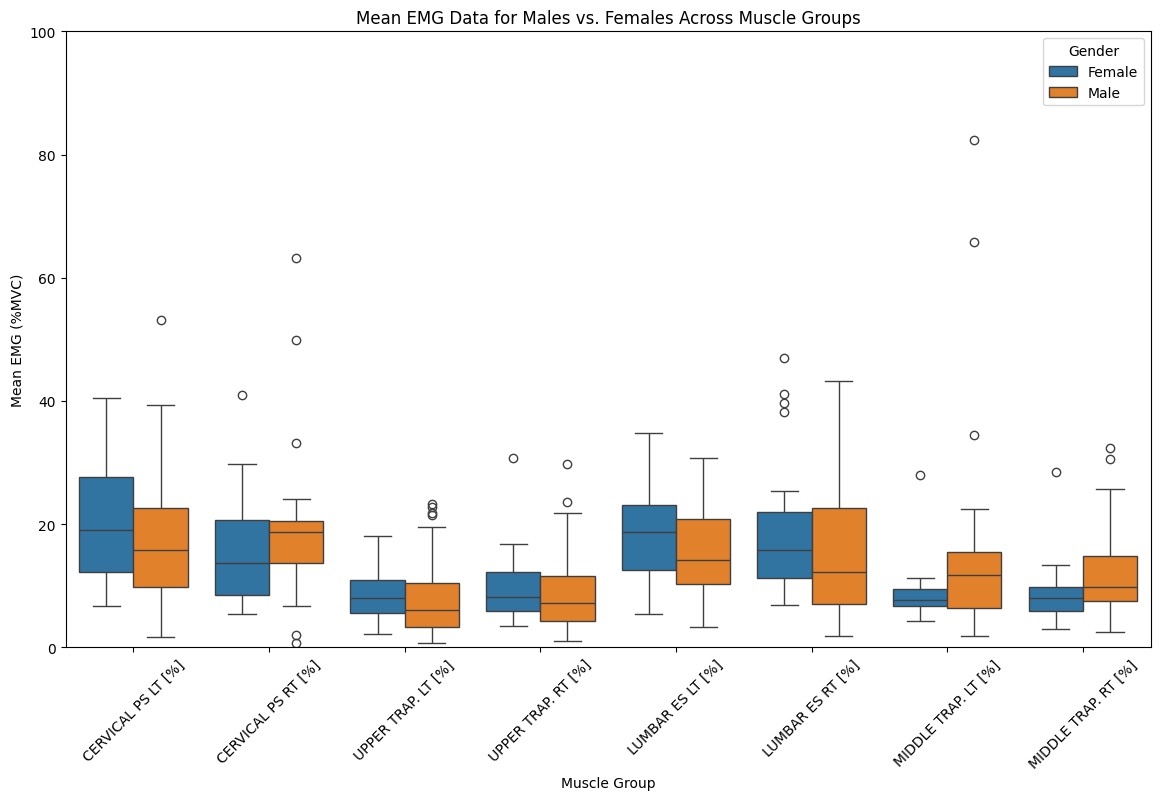

In [36]:
# Grab the correct Gender data
mean_female = csv_data_merged['Mean'][csv_data_merged['Mean']['Gender'] == 'female']
mean_male = csv_data_merged['Mean'][csv_data_merged['Mean']['Gender'] == 'male']

# Combine the data for plotting
combined_data = pd.concat([mean_female.assign(Gender='Female'), mean_male.assign(Gender='Male')])

# Melt the dataframe to long format for seaborn
melted_data = combined_data.melt(id_vars=['Participant ID', 'Gender'], 
                                 value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                 var_name='Muscle Group', value_name='Mean EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Mean EMG (%MVC)', hue='Gender', data=melted_data)

plt.xlabel('Muscle Group')
plt.ylabel('Mean EMG (%MVC)')
plt.title('Mean EMG Data for Males vs. Females Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.ylim(0, 100)
plt.show()

In [37]:
# Separate the mean EMG data for males and females
mean_emg_female = merged_mean_data[merged_mean_data['Gender'] == 'female'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
mean_emg_male = merged_mean_data[merged_mean_data['Gender'] == 'male'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group
t_test_results = {}
for column in mean_emg_female.columns:
    t_stat, p_value = ttest_ind(mean_emg_female[column], mean_emg_male[column], nan_policy='omit')
    t_test_results[column] = {'t_stat': t_stat, 'p_value': p_value}

# Display the results
for muscle, results in t_test_results.items():
    print(f"{muscle}: t-statistic = {results['t_stat']}, p-value = {results['p_value']}")

CERVICAL PS LT [%]: t-statistic = 0.9805902199950813, p-value = 0.3311678667671043
CERVICAL PS RT [%]: t-statistic = -0.9064968869815029, p-value = 0.3687002370674355
UPPER TRAP. LT [%]: t-statistic = 0.1075821215109932, p-value = 0.9147259045124204
UPPER TRAP. RT [%]: t-statistic = 0.12760950251090136, p-value = 0.8989320427206655
LUMBAR ES LT [%]: t-statistic = 1.245910551366155, p-value = 0.21817576268784314
LUMBAR ES RT [%]: t-statistic = 1.0489901241727535, p-value = 0.2989426807030476
MIDDLE TRAP. LT [%]: t-statistic = -1.9440036741723468, p-value = 0.05711291499638945
MIDDLE TRAP. RT [%]: t-statistic = -2.078753675739474, p-value = 0.042405173077278015


Looking at the peak absolute data:

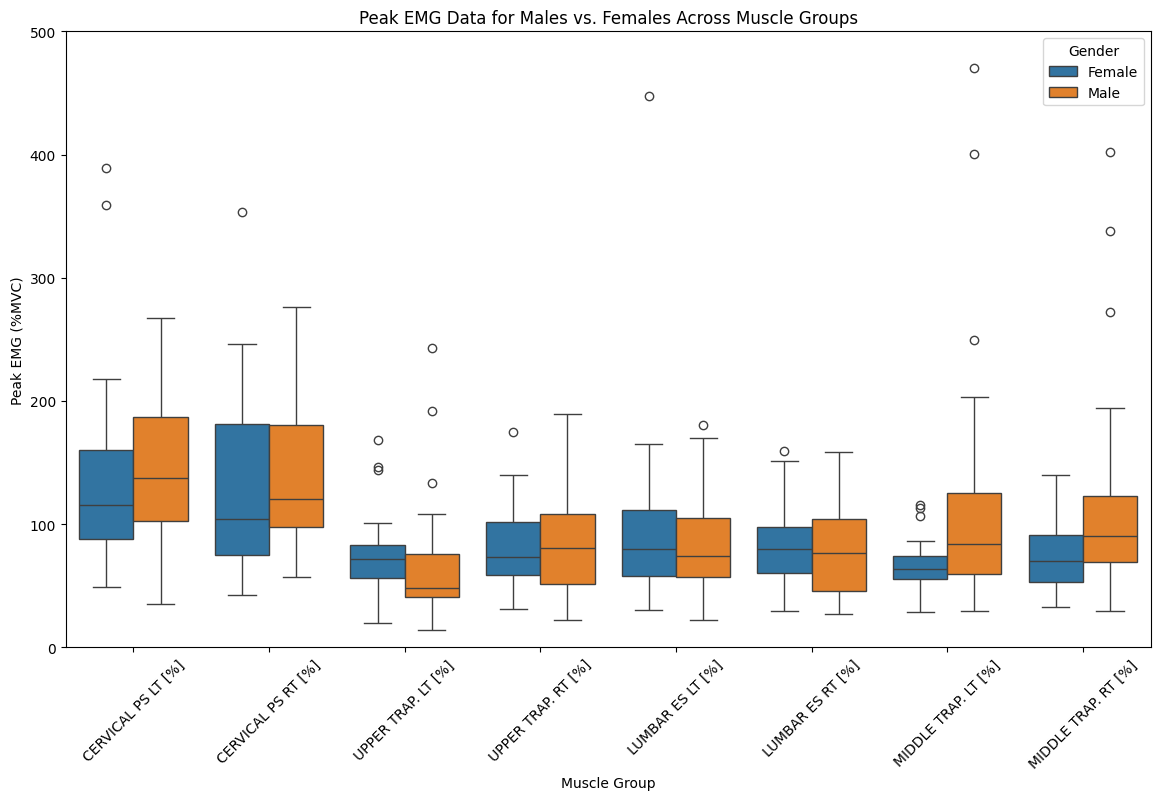

In [38]:
# Grab the correct Gender data
peak_female = csv_data_merged['Peak'][csv_data_merged['Peak']['Gender'] == 'female']
peak_male = csv_data_merged['Peak'][csv_data_merged['Peak']['Gender'] == 'male']

# Combine the data for plotting
combined_data_peak = pd.concat([peak_female.assign(Gender='Female'), peak_male.assign(Gender='Male')])

# Melt the dataframe to long format for seaborn
melted_data_peak = combined_data_peak.melt(id_vars=['Participant ID', 'Gender'], 
                                           value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                           var_name='Muscle Group', value_name='Peak EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Peak EMG (%MVC)', hue='Gender', data=melted_data_peak)

plt.xlabel('Muscle Group')
plt.ylabel('Peak EMG (%MVC)')
plt.title('Peak EMG Data for Males vs. Females Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.ylim(0, 500)
plt.show()

In [39]:
# Separate the peak EMG data for males and females
peak_emg_female = csv_data_merged['Peak'][csv_data_merged['Peak']['Gender'] == 'female'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
peak_emg_male = csv_data_merged['Peak'][csv_data_merged['Peak']['Gender'] == 'male'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group
t_test_results_peak = {}
for column in peak_emg_female.columns:
    t_stat, p_value = ttest_ind(peak_emg_female[column], peak_emg_male[column], nan_policy='omit')
    t_test_results_peak[column] = {'t_stat': t_stat, 'p_value': p_value}

# Display the results
for muscle, results in t_test_results_peak.items():
    print(f"{muscle}: t-statistic = {results['t_stat']}, p-value = {results['p_value']}")

CERVICAL PS LT [%]: t-statistic = 0.6499469553594904, p-value = 0.5184819975210082
CERVICAL PS RT [%]: t-statistic = -0.3680679589260093, p-value = 0.7142614610625628
UPPER TRAP. LT [%]: t-statistic = 0.6693389706188275, p-value = 0.5061311251625342
UPPER TRAP. RT [%]: t-statistic = -0.12307226131373715, p-value = 0.9025068029815538
LUMBAR ES LT [%]: t-statistic = 1.3819641562910416, p-value = 0.17267309262260921
LUMBAR ES RT [%]: t-statistic = 0.40790455229650585, p-value = 0.6849869028184805
MIDDLE TRAP. LT [%]: t-statistic = -2.3902738845782796, p-value = 0.02035384427890358
MIDDLE TRAP. RT [%]: t-statistic = -2.1942526170472485, p-value = 0.032539225294639776


Look at the variability data by gender differences:

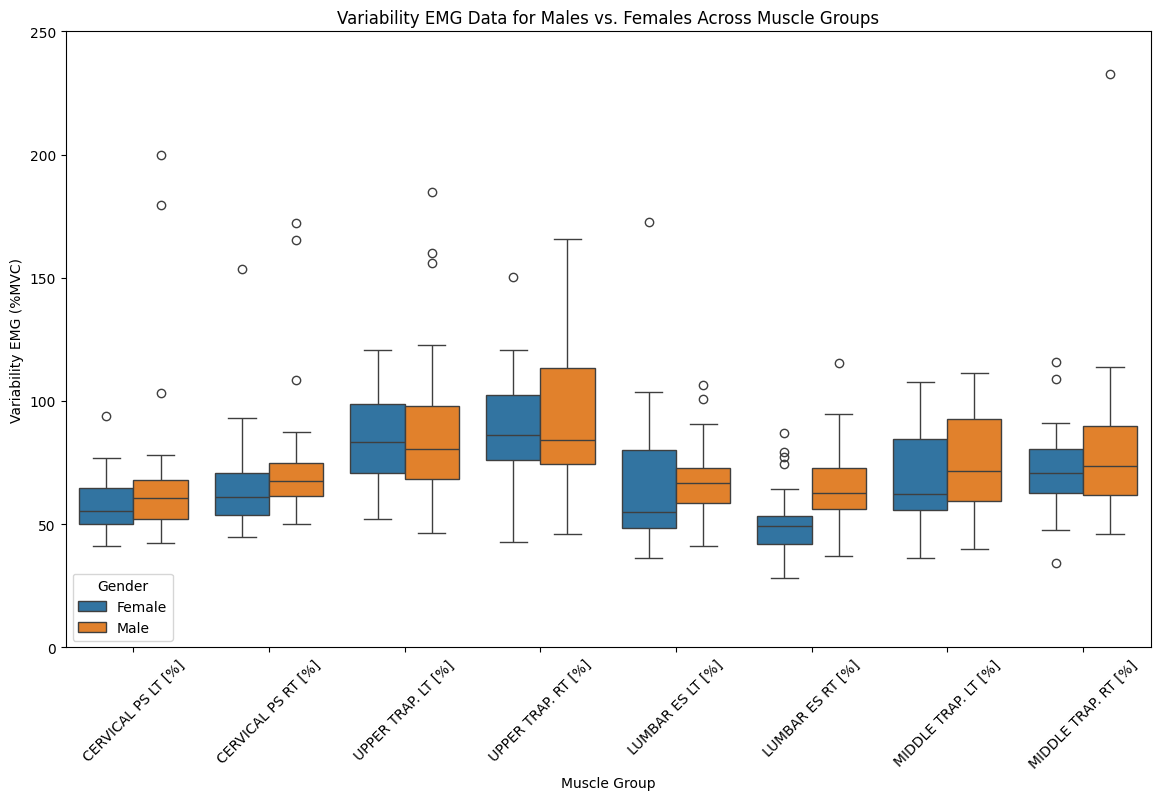

In [40]:
# Grab the correct Gender data
variability_female = csv_data_merged['Variability'][csv_data_merged['Variability']['Gender'] == 'female']
variability_male = csv_data_merged['Variability'][csv_data_merged['Variability']['Gender'] == 'male']

# Combine the data for plotting
combined_data_variability = pd.concat([variability_female.assign(Gender='Female'), variability_male.assign(Gender='Male')])

# Melt the dataframe to long format for seaborn
melted_data_variability = combined_data_variability.melt(id_vars=['Participant ID', 'Gender'], 
                                                         value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                                         var_name='Muscle Group', value_name='Variability EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Variability EMG (%MVC)', hue='Gender', data=melted_data_variability)

plt.xlabel('Muscle Group')
plt.ylabel('Variability EMG (%MVC)')
plt.title('Variability EMG Data for Males vs. Females Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.ylim(0, 250)
plt.show()

In [41]:
# Separate the variability EMG data for males and females
variability_emg_female = csv_data_merged['Variability'][csv_data_merged['Variability']['Gender'] == 'female'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
variability_emg_male = csv_data_merged['Variability'][csv_data_merged['Variability']['Gender'] == 'male'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group
t_test_results_variability = {}
for column in variability_emg_female.columns:
    t_stat, p_value = ttest_ind(variability_emg_female[column], variability_emg_male[column], nan_policy='omit')
    t_test_results_variability[column] = {'t_stat': t_stat, 'p_value': p_value}

# Display the results
for muscle, results in t_test_results_variability.items():
    print(f"{muscle}: t-statistic = {results['t_stat']}, p-value = {results['p_value']}")

CERVICAL PS LT [%]: t-statistic = -1.2618474384201694, p-value = 0.2124269546050334
CERVICAL PS RT [%]: t-statistic = -1.5760398264623696, p-value = 0.12085764943169541
UPPER TRAP. LT [%]: t-statistic = -0.4699507157376059, p-value = 0.640282625374917
UPPER TRAP. RT [%]: t-statistic = -0.6958052596799305, p-value = 0.4895346984327955
LUMBAR ES LT [%]: t-statistic = -0.21086550652067299, p-value = 0.8337859425360649
LUMBAR ES RT [%]: t-statistic = -3.331965105609454, p-value = 0.001576840408699384
MIDDLE TRAP. LT [%]: t-statistic = -1.1722270397492855, p-value = 0.24625162308483334
MIDDLE TRAP. RT [%]: t-statistic = -1.159891891935448, p-value = 0.25119560678356834


### Stratify by Attending vs. Nonattending:

Looking at the mean data:

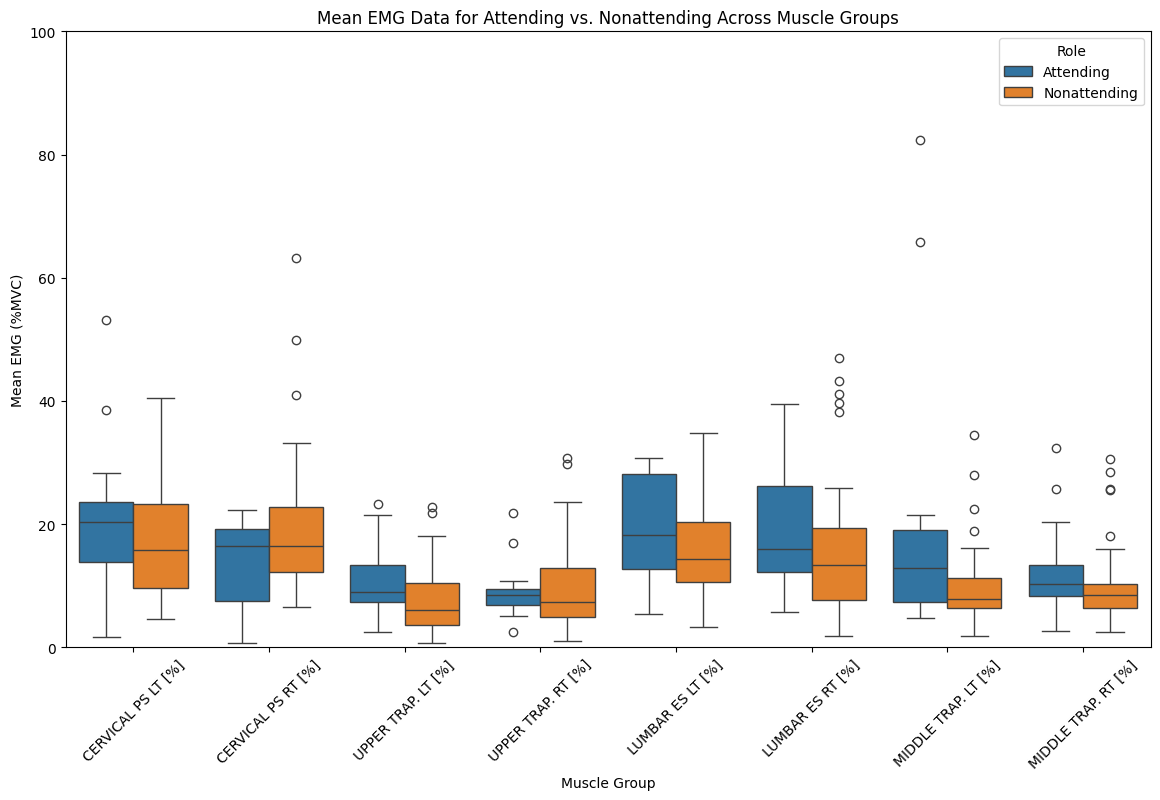

In [42]:
# Grab the correct Gender data
mean_attending = csv_data_merged['Mean'][csv_data_merged['Mean']['Role in cath lab'] == 'Attending']
mean_nonattending = csv_data_merged['Mean'][csv_data_merged['Mean']['Role in cath lab'] != 'Attending']

# Combine the data for plotting
combined_data = pd.concat([mean_attending.assign(Role='Attending'), mean_nonattending.assign(Role='Nonattending')])

# Melt the dataframe to long format for seaborn
melted_data = combined_data.melt(id_vars=['Participant ID', 'Role'], 
                                 value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                 var_name='Muscle Group', value_name='Mean EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Mean EMG (%MVC)', hue='Role', data=melted_data)

plt.xlabel('Muscle Group')
plt.ylabel('Mean EMG (%MVC)')
plt.title('Mean EMG Data for Attending vs. Nonattending Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Role')
plt.ylim(0, 100)
plt.show()

In [43]:
# Separate the mean EMG data for males and females
mean_emg_attending = merged_mean_data[merged_mean_data['Role in cath lab'] == 'Attending'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
mean_emg_nonattending = merged_mean_data[merged_mean_data['Role in cath lab'] != 'Attending'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group
t_test_results = {}
for column in mean_emg_attending.columns:
    t_stat, p_value = ttest_ind(mean_emg_attending[column], mean_emg_nonattending[column], nan_policy='omit')
    t_test_results[column] = {'t_stat': t_stat, 'p_value': p_value}

# Display the results
for muscle, results in t_test_results.items():
    print(f"{muscle}: t-statistic = {results['t_stat']}, p-value = {results['p_value']}")

CERVICAL PS LT [%]: t-statistic = 1.2227185294850798, p-value = 0.22674578750921373
CERVICAL PS RT [%]: t-statistic = -1.5882430931379319, p-value = 0.1180700181105757
UPPER TRAP. LT [%]: t-statistic = 1.9551556812891944, p-value = 0.0557485724378488
UPPER TRAP. RT [%]: t-statistic = -0.09466400343436761, p-value = 0.9249321106299453
LUMBAR ES LT [%]: t-statistic = 1.6435844531122472, p-value = 0.10607266795100566
LUMBAR ES RT [%]: t-statistic = 1.1545960233721793, p-value = 0.2534353564617125
MIDDLE TRAP. LT [%]: t-statistic = 2.891110042932836, p-value = 0.0055198907539743365
MIDDLE TRAP. RT [%]: t-statistic = 1.4250637078263473, p-value = 0.15989327353078484


Look at the peak absolute data:

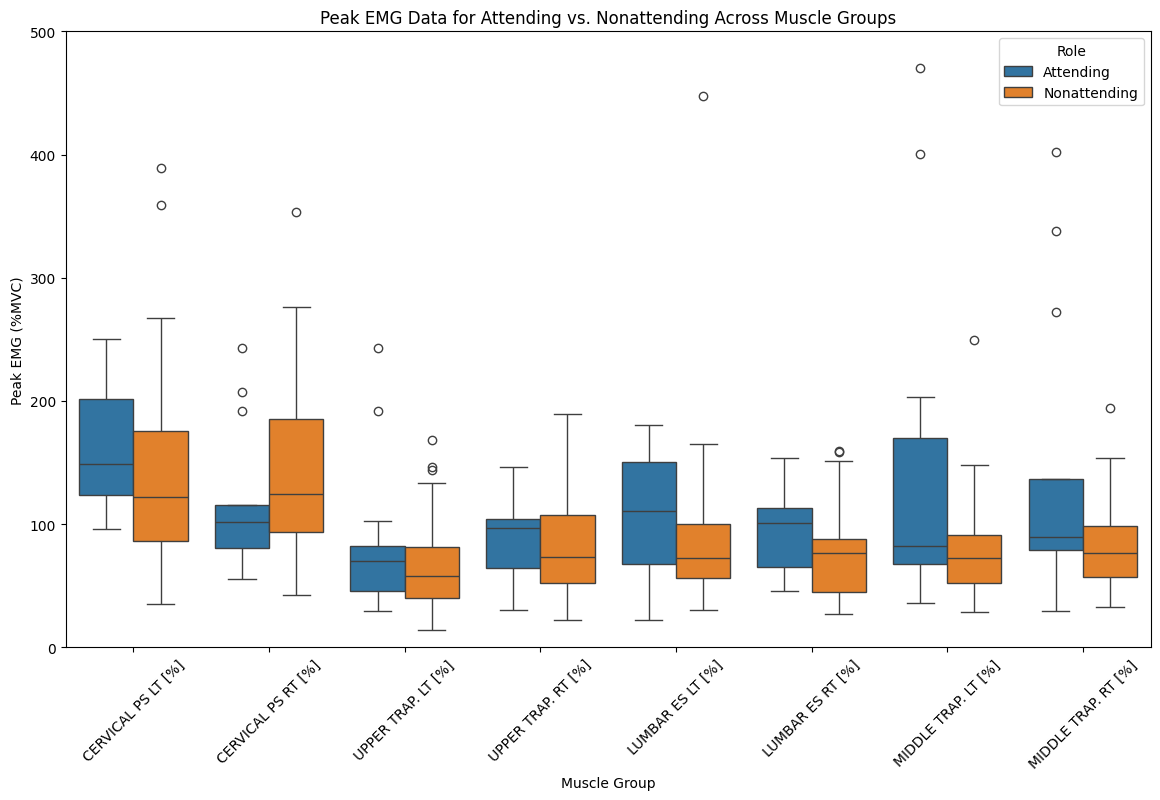

In [44]:
# Grab the correct Role data
peak_attending = csv_data_merged['Peak'][csv_data_merged['Peak']['Role in cath lab'] == 'Attending']
peak_nonattending = csv_data_merged['Peak'][csv_data_merged['Peak']['Role in cath lab'] != 'Attending']

# Combine the data for plotting
combined_data_peak = pd.concat([peak_attending.assign(Role='Attending'), peak_nonattending.assign(Role='Nonattending')])

# Melt the dataframe to long format for seaborn
melted_data_peak = combined_data_peak.melt(id_vars=['Participant ID', 'Role'], 
                                           value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                           var_name='Muscle Group', value_name='Peak EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Peak EMG (%MVC)', hue='Role', data=melted_data_peak)

plt.xlabel('Muscle Group')
plt.ylabel('Peak EMG (%MVC)')
plt.title('Peak EMG Data for Attending vs. Nonattending Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Role')
plt.ylim(0, 500)
plt.show()

In [45]:
# Separate the peak EMG data for attending and nonattending
peak_emg_attending = merged_peak_data[merged_peak_data['Role in cath lab'] == 'Attending'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
peak_emg_nonattending = merged_peak_data[merged_peak_data['Role in cath lab'] != 'Attending'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group
t_test_results_peak = {}
for column in peak_emg_attending.columns:
    t_stat, p_value = ttest_ind(peak_emg_attending[column], peak_emg_nonattending[column], nan_policy='omit')
    t_test_results_peak[column] = {'t_stat': t_stat, 'p_value': p_value}

# Display the results
for muscle, results in t_test_results_peak.items():
    print(f"{muscle}: t-statistic = {results['t_stat']}, p-value = {results['p_value']}")

CERVICAL PS LT [%]: t-statistic = 0.479876782917933, p-value = 0.6332530960054923
CERVICAL PS RT [%]: t-statistic = -1.109571364506572, p-value = 0.2721006869035099
UPPER TRAP. LT [%]: t-statistic = 1.5027555009881157, p-value = 0.13872805533971866
UPPER TRAP. RT [%]: t-statistic = 0.2599375400092035, p-value = 0.7959005016992933
LUMBAR ES LT [%]: t-statistic = 0.3548736830663682, p-value = 0.7240664956244458
LUMBAR ES RT [%]: t-statistic = 1.196396019206411, p-value = 0.2368667888494633
MIDDLE TRAP. LT [%]: t-statistic = 3.2527248218719564, p-value = 0.001973318167858749
MIDDLE TRAP. RT [%]: t-statistic = 2.943714817436669, p-value = 0.00477305995476


Look at the variability data:

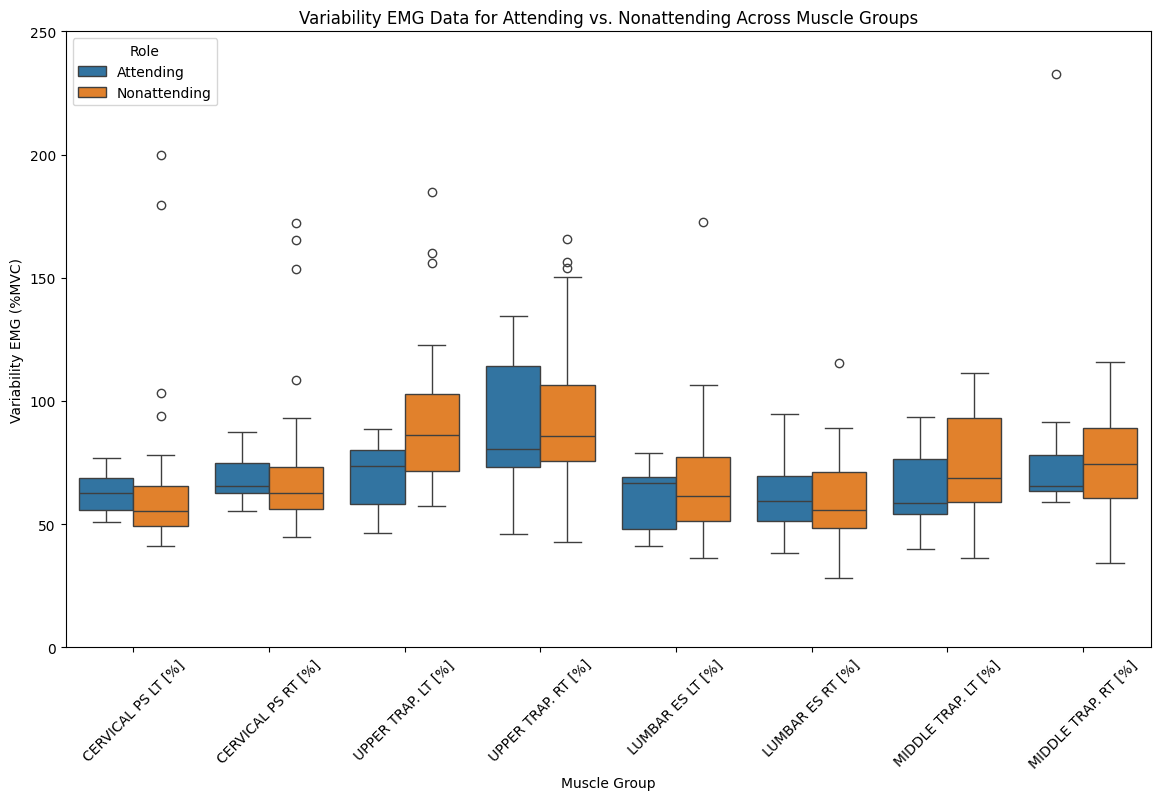

In [46]:
# Grab the correct Role data
variability_attending = csv_data_merged['Variability'][csv_data_merged['Variability']['Role in cath lab'] == 'Attending']
variability_nonattending = csv_data_merged['Variability'][csv_data_merged['Variability']['Role in cath lab'] != 'Attending']

# Combine the data for plotting
combined_data_variability = pd.concat([variability_attending.assign(Role='Attending'), variability_nonattending.assign(Role='Nonattending')])

# Melt the dataframe to long format for seaborn
melted_data_variability = combined_data_variability.melt(id_vars=['Participant ID', 'Role'], 
                                                         value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                                         var_name='Muscle Group', value_name='Variability EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Variability EMG (%MVC)', hue='Role', data=melted_data_variability)

plt.xlabel('Muscle Group')
plt.ylabel('Variability EMG (%MVC)')
plt.title('Variability EMG Data for Attending vs. Nonattending Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Role')
plt.ylim(0, 250)
plt.show()

In [47]:
# Separate the variability EMG data for attending and nonattending
variability_emg_attending = merged_variability_data[merged_variability_data['Role in cath lab'] == 'Attending'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
variability_emg_nonattending = merged_variability_data[merged_variability_data['Role in cath lab'] != 'Attending'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group
t_test_results_variability = {}
for column in variability_emg_attending.columns:
    t_stat, p_value = ttest_ind(variability_emg_attending[column], variability_emg_nonattending[column], nan_policy='omit')
    t_test_results_variability[column] = {'t_stat': t_stat, 'p_value': p_value}

# Display the results
for muscle, results in t_test_results_variability.items():
    print(f"{muscle}: t-statistic = {results['t_stat']}, p-value = {results['p_value']}")

CERVICAL PS LT [%]: t-statistic = 1.673265815966703, p-value = 0.10005914446444836
CERVICAL PS RT [%]: t-statistic = 2.3210828212274577, p-value = 0.024086866586655112
UPPER TRAP. LT [%]: t-statistic = -2.981847261476429, p-value = 0.004291673277404434
UPPER TRAP. RT [%]: t-statistic = -0.48122127957540073, p-value = 0.632303531888009
LUMBAR ES LT [%]: t-statistic = -1.021054137766547, p-value = 0.31178152639155704
LUMBAR ES RT [%]: t-statistic = 0.12077254271679985, p-value = 0.9043279021137427
MIDDLE TRAP. LT [%]: t-statistic = -1.6427157443726195, p-value = 0.10625301548474203
MIDDLE TRAP. RT [%]: t-statistic = 0.6699850596426764, p-value = 0.5057223833285936


### Stratify by Lead Versus Rampart:

Look at the mean data:

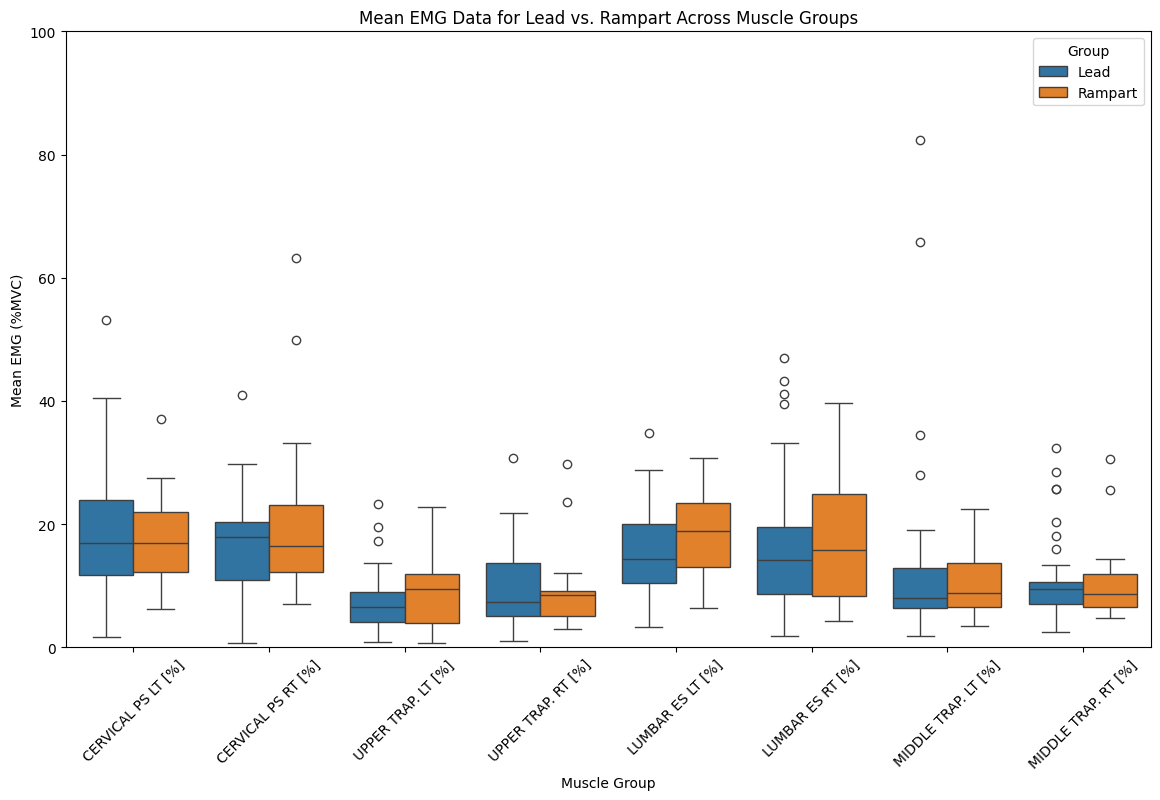

In [48]:
# Filter the data for lead and rampart subjects
mean_lead = merged_mean_data[merged_mean_data['Participant ID'].isin(subject_ids_lead)]
mean_rampart = merged_mean_data[merged_mean_data['Participant ID'].isin(subject_ids_rampart)]

# Combine the data for plotting
combined_data_mean = pd.concat([mean_lead.assign(Group='Lead'), mean_rampart.assign(Group='Rampart')])

# Melt the dataframe to long format for seaborn
melted_data_mean = combined_data_mean.melt(id_vars=['Participant ID', 'Group'], 
                                           value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                           var_name='Muscle Group', value_name='Mean EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Mean EMG (%MVC)', hue='Group', data=melted_data_mean)

plt.xlabel('Muscle Group')
plt.ylabel('Mean EMG (%MVC)')
plt.title('Mean EMG Data for Lead vs. Rampart Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.ylim(0, 100)
plt.show()

In [49]:
# Separate the mean EMG data for lead and rampart subjects
mean_emg_lead = merged_mean_data[merged_mean_data['Participant ID'].isin(subject_ids_lead)][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
mean_emg_rampart = merged_mean_data[merged_mean_data['Participant ID'].isin(subject_ids_rampart)][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group
t_test_results = {}
for column in mean_emg_lead.columns:
    t_stat, p_value = ttest_ind(mean_emg_lead[column], mean_emg_rampart[column], nan_policy='omit')
    t_test_results[column] = {'t_stat': t_stat, 'p_value': p_value}

# Display the results
for muscle, results in t_test_results.items():
    print(f"{muscle}: t-statistic = {results['t_stat']}, p-value = {results['p_value']}")

CERVICAL PS LT [%]: t-statistic = 0.6672845233316271, p-value = 0.5074320373297357
CERVICAL PS RT [%]: t-statistic = -1.5411718288203764, p-value = 0.1291151389336527
UPPER TRAP. LT [%]: t-statistic = -1.2261411750618005, p-value = 0.22546573146524906
UPPER TRAP. RT [%]: t-statistic = 0.31325908680469255, p-value = 0.7552906095121392
LUMBAR ES LT [%]: t-statistic = -1.3839784925218137, p-value = 0.17205880538100696
LUMBAR ES RT [%]: t-statistic = -0.476426187612722, p-value = 0.6357291148123894
MIDDLE TRAP. LT [%]: t-statistic = 0.7496547865538598, p-value = 0.45671627484521804
MIDDLE TRAP. RT [%]: t-statistic = 0.08900777055611041, p-value = 0.9294050303091673


Look at the peak absolute data:

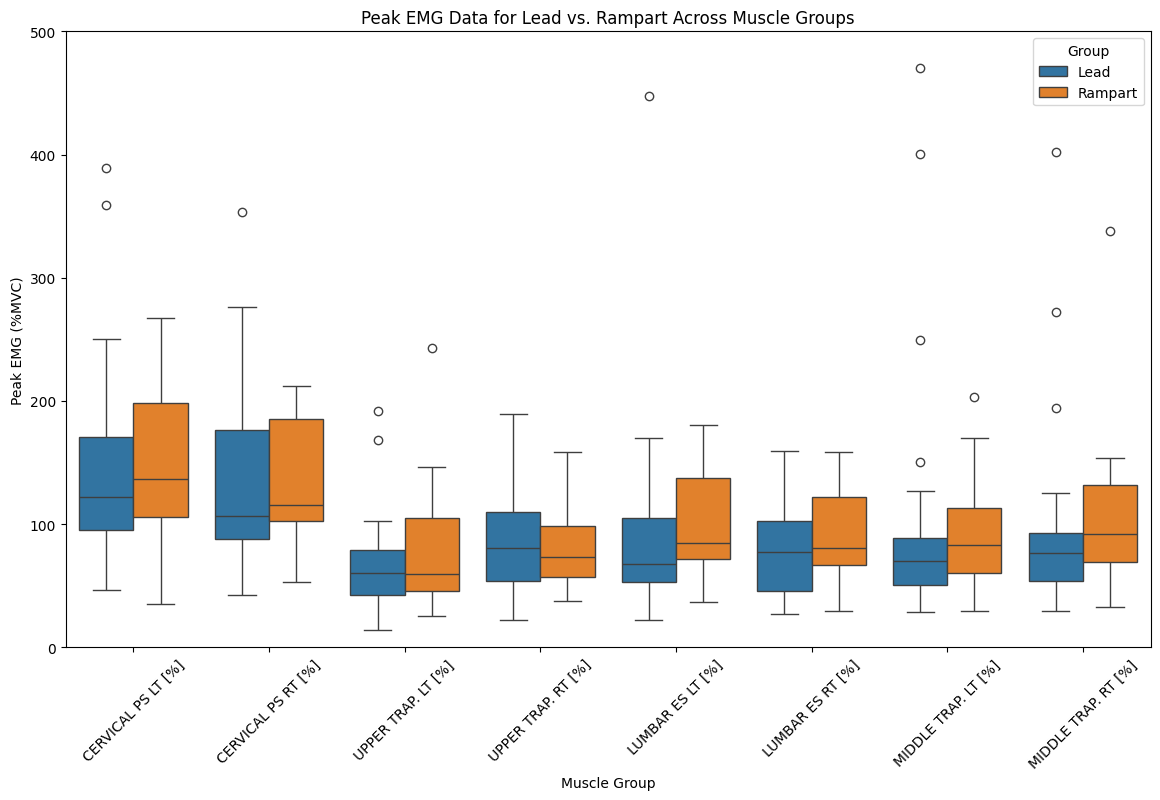

In [50]:
# Filter the data for lead and rampart subjects
peak_lead = merged_peak_data[merged_peak_data['Participant ID'].isin(subject_ids_lead)]
peak_rampart = merged_peak_data[merged_peak_data['Participant ID'].isin(subject_ids_rampart)]

# Combine the data for plotting
combined_data_peak = pd.concat([peak_lead.assign(Group='Lead'), peak_rampart.assign(Group='Rampart')])

# Melt the dataframe to long format for seaborn
melted_data_peak = combined_data_peak.melt(id_vars=['Participant ID', 'Group'], 
                                           value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                           var_name='Muscle Group', value_name='Peak EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Peak EMG (%MVC)', hue='Group', data=melted_data_peak)

plt.xlabel('Muscle Group')
plt.ylabel('Peak EMG (%MVC)')
plt.title('Peak EMG Data for Lead vs. Rampart Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.ylim(0, 500)
plt.show()

In [51]:
# Separate the peak EMG data for lead and rampart subjects
peak_emg_lead = merged_peak_data[merged_peak_data['Participant ID'].isin(subject_ids_lead)][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
peak_emg_rampart = merged_peak_data[merged_peak_data['Participant ID'].isin(subject_ids_rampart)][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group
t_test_results_peak = {}
for column in peak_emg_lead.columns:
    t_stat, p_value = ttest_ind(peak_emg_lead[column], peak_emg_rampart[column], nan_policy='omit')
    t_test_results_peak[column] = {'t_stat': t_stat, 'p_value': p_value}

# Display the results
for muscle, results in t_test_results_peak.items():
    print(f"{muscle}: t-statistic = {results['t_stat']}, p-value = {results['p_value']}")

CERVICAL PS LT [%]: t-statistic = -0.9633535148497212, p-value = 0.33966448382707426
CERVICAL PS RT [%]: t-statistic = -1.0309490826623007, p-value = 0.3071602298637605
UPPER TRAP. LT [%]: t-statistic = -1.3216361678557393, p-value = 0.19186142152385582
UPPER TRAP. RT [%]: t-statistic = 0.33142450178674027, p-value = 0.7416066679614193
LUMBAR ES LT [%]: t-statistic = -1.4049632881701153, p-value = 0.16575893671394046
LUMBAR ES RT [%]: t-statistic = -1.0959317620607878, p-value = 0.2780636622462774
MIDDLE TRAP. LT [%]: t-statistic = 0.22463730058169284, p-value = 0.8231093048706298
MIDDLE TRAP. RT [%]: t-statistic = -0.8649330886327928, p-value = 0.39090174884956463


Look at the variability data:

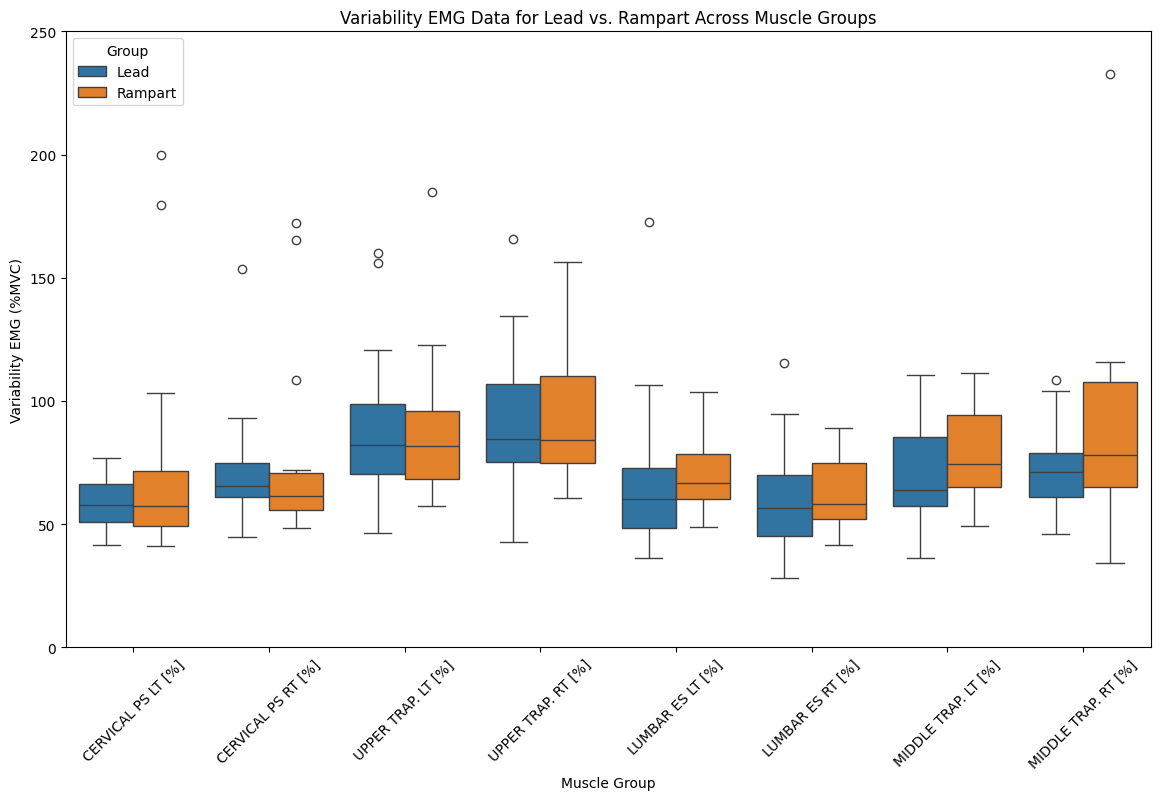

In [52]:
# Filter the data for lead and rampart subjects
variability_lead = merged_variability_data[merged_variability_data['Participant ID'].isin(subject_ids_lead)]
variability_rampart = merged_variability_data[merged_variability_data['Participant ID'].isin(subject_ids_rampart)]

# Combine the data for plotting
combined_data_variability = pd.concat([variability_lead.assign(Group='Lead'), variability_rampart.assign(Group='Rampart')])

# Melt the dataframe to long format for seaborn
melted_data_variability = combined_data_variability.melt(id_vars=['Participant ID', 'Group'], 
                                                         value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                                         var_name='Muscle Group', value_name='Variability EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Variability EMG (%MVC)', hue='Group', data=melted_data_variability)

plt.xlabel('Muscle Group')
plt.ylabel('Variability EMG (%MVC)')
plt.title('Variability EMG Data for Lead vs. Rampart Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.ylim(0, 250)
plt.show()

In [53]:
# Separate the variability EMG data for lead and rampart subjects
variability_emg_lead = merged_variability_data[merged_variability_data['Participant ID'].isin(subject_ids_lead)][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
variability_emg_rampart = merged_variability_data[merged_variability_data['Participant ID'].isin(subject_ids_rampart)][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group
t_test_results_variability = {}
for column in variability_emg_lead.columns:
    t_stat, p_value = ttest_ind(variability_emg_lead[column], variability_emg_rampart[column], nan_policy='omit')
    t_test_results_variability[column] = {'t_stat': t_stat, 'p_value': p_value}

# Display the results
for muscle, results in t_test_results_variability.items():
    print(f"{muscle}: t-statistic = {results['t_stat']}, p-value = {results['p_value']}")

CERVICAL PS LT [%]: t-statistic = 0.07439507583216672, p-value = 0.9409709380160617
CERVICAL PS RT [%]: t-statistic = 0.7003721098235194, p-value = 0.4867016890733963
UPPER TRAP. LT [%]: t-statistic = -0.1295509561565399, p-value = 0.8974030672436841
UPPER TRAP. RT [%]: t-statistic = -0.7504470127051857, p-value = 0.45624312551780644
LUMBAR ES LT [%]: t-statistic = -1.0884714614851099, p-value = 0.28122117041681705
LUMBAR ES RT [%]: t-statistic = -0.680168410634451, p-value = 0.49935827907887775
MIDDLE TRAP. LT [%]: t-statistic = -1.454284899966125, p-value = 0.15165539586152046
MIDDLE TRAP. RT [%]: t-statistic = -2.2708812887794707, p-value = 0.027165638969508785


### Stratify by Case Length:

Look at the mean data:

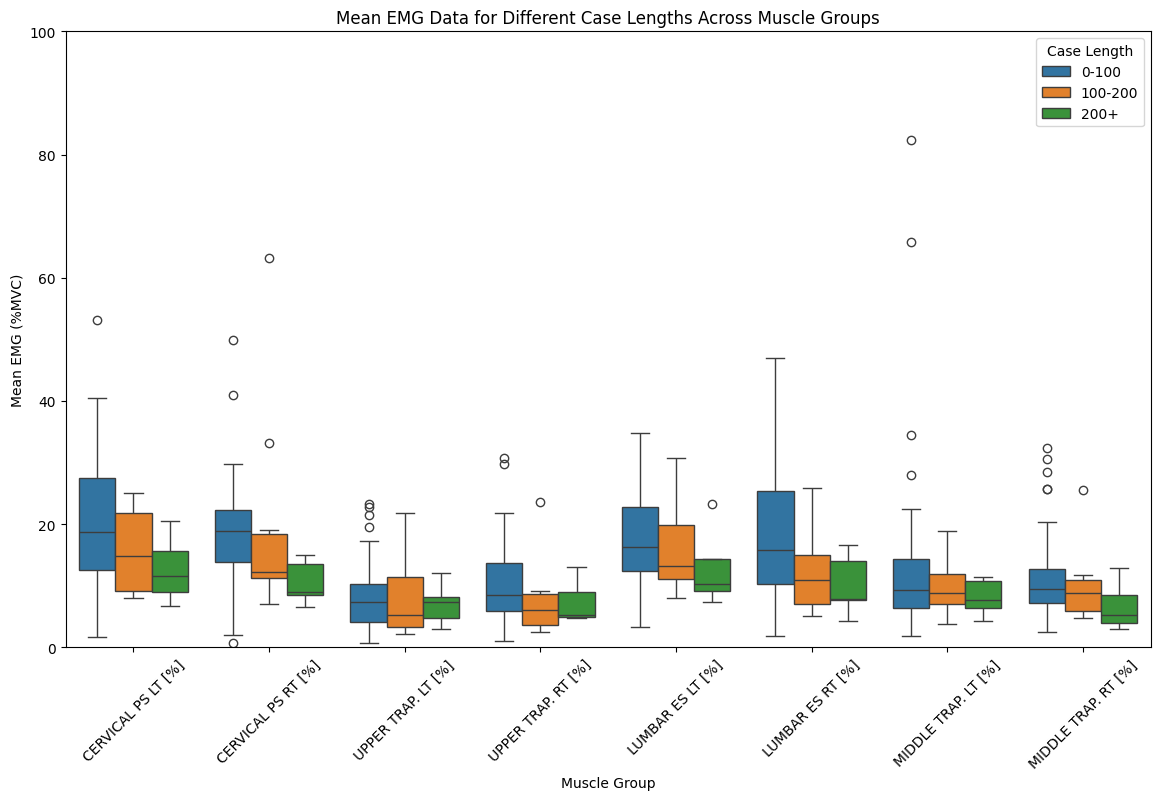

In [54]:
# Define the time bins
bins = [0, 100, 200, 600]
labels = ['0-100', '100-200', '200+']

# Create a new column for the time bins
merged_mean_data['Time_Bin'] = pd.cut(merged_mean_data['Total case length in minutes (first lidocaine injection - sheath removal)'], bins=bins, labels=labels, right=False)

# Filter the data for each time bin
mean_0_100 = merged_mean_data[merged_mean_data['Time_Bin'] == '0-100']
mean_100_200 = merged_mean_data[merged_mean_data['Time_Bin'] == '100-200']
mean_200_plus = merged_mean_data[merged_mean_data['Time_Bin'] == '200+']

# Combine the data for plotting
combined_data_mean = pd.concat([mean_0_100.assign(Time_Bin='0-100'), mean_100_200.assign(Time_Bin='100-200'), mean_200_plus.assign(Time_Bin='200+')])

# Melt the dataframe to long format for seaborn
melted_data_mean = combined_data_mean.melt(id_vars=['Participant ID', 'Time_Bin'], 
                                           value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                           var_name='Muscle Group', value_name='Mean EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Mean EMG (%MVC)', hue='Time_Bin', data=melted_data_mean)

plt.xlabel('Muscle Group')
plt.ylabel('Mean EMG (%MVC)')
plt.title('Mean EMG Data for Different Case Lengths Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Case Length')
plt.ylim(0, 100)
plt.show()

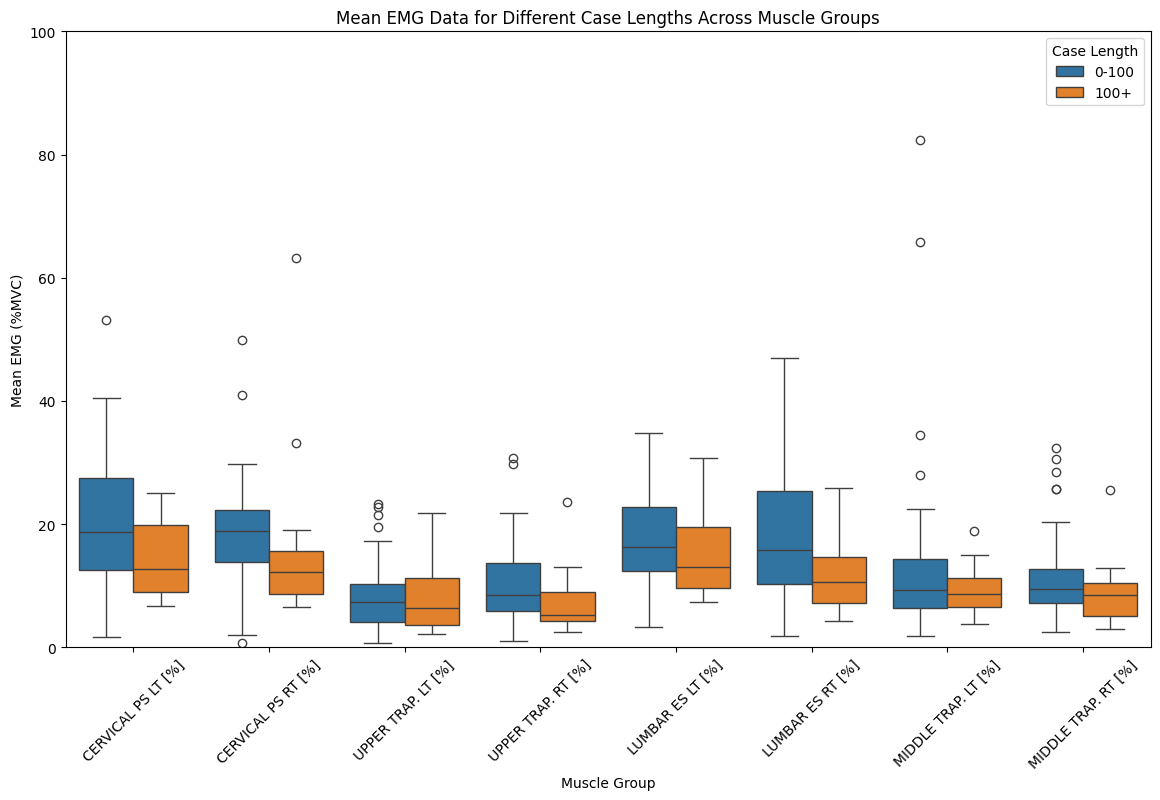

In [63]:
# Define the time bins
bins = [0, 100, 600]
labels = ['0-100', '100+']

# Create a new column for the time bins
merged_mean_data['Time_Bin'] = pd.cut(merged_mean_data['Total case length in minutes (first lidocaine injection - sheath removal)'], bins=bins, labels=labels, right=False)

# Filter the data for each time bin
mean_0_100 = merged_mean_data[merged_mean_data['Time_Bin'] == '0-100']
mean_100_plus = merged_mean_data[merged_mean_data['Time_Bin'] == '100+']

# Combine the data for plotting
combined_data_mean = pd.concat([mean_0_100.assign(Time_Bin='0-100'), mean_100_plus.assign(Time_Bin='100+')])

# Melt the dataframe to long format for seaborn
melted_data_mean = combined_data_mean.melt(id_vars=['Participant ID', 'Time_Bin'], 
                                           value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                           var_name='Muscle Group', value_name='Mean EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Mean EMG (%MVC)', hue='Time_Bin', data=melted_data_mean)

plt.xlabel('Muscle Group')
plt.ylabel('Mean EMG (%MVC)')
plt.title('Mean EMG Data for Different Case Lengths Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Case Length')
plt.ylim(0, 100)
plt.show()


In [60]:
# Separate the mean EMG data for different time bins
mean_emg_0_100 = merged_mean_data[merged_mean_data['Time_Bin'] == '0-100'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
mean_emg_100_200 = merged_mean_data[merged_mean_data['Time_Bin'] == '100-200'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
mean_emg_200_plus = merged_mean_data[merged_mean_data['Time_Bin'] == '200+'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group between different time bins
t_test_results_time_bins = {}
for column in mean_emg_0_100.columns:
    t_stat_0_100_vs_100_200, p_value_0_100_vs_100_200 = ttest_ind(mean_emg_0_100[column], mean_emg_100_200[column], nan_policy='omit')
    t_stat_0_100_vs_200_plus, p_value_0_100_vs_200_plus = ttest_ind(mean_emg_0_100[column], mean_emg_200_plus[column], nan_policy='omit')
    t_stat_100_200_vs_200_plus, p_value_100_200_vs_200_plus = ttest_ind(mean_emg_100_200[column], mean_emg_200_plus[column], nan_policy='omit')
    
    t_test_results_time_bins[column] = {
        '0-100 vs 100-200': {'t_stat': t_stat_0_100_vs_100_200, 'p_value': p_value_0_100_vs_100_200},
        '0-100 vs 200+': {'t_stat': t_stat_0_100_vs_200_plus, 'p_value': p_value_0_100_vs_200_plus},
        '100-200 vs 200+': {'t_stat': t_stat_100_200_vs_200_plus, 'p_value': p_value_100_200_vs_200_plus}
    }

# Display the results with p-values <= 0.05
for muscle, results in t_test_results_time_bins.items():
    for comparison, stats in results.items():
        if stats['p_value'] <= 0.05:
            print(f"{muscle} - {comparison}: t-statistic = {stats['t_stat']}, p-value = {stats['p_value']}")

In [66]:
# Separate the mean EMG data for different time bins
mean_emg_0_100 = merged_mean_data[merged_mean_data['Time_Bin'] == '0-100'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
mean_emg_100_plus = merged_mean_data[merged_mean_data['Time_Bin'] == '100+'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group between different time bins
t_test_results_time_bins = {}
for column in mean_emg_0_100.columns:
    t_stat_0_100_vs_100_plus, p_value_0_100_vs_100_plus = ttest_ind(mean_emg_0_100[column], mean_emg_100_plus[column], nan_policy='omit')
    
    t_test_results_time_bins[column] = {
        '0-100 vs 100+': {'t_stat': t_stat_0_100_vs_100_plus, 'p_value': p_value_0_100_vs_100_plus}
    }

# Display the results with p-values <= 0.05
for muscle, results in t_test_results_time_bins.items():
    for comparison, stats in results.items():
        if stats['p_value'] <= 0.05:
            print(f"{muscle} - {comparison}: t-statistic = {stats['t_stat']}, p-value = {stats['p_value']}")


LUMBAR ES RT [%] - 0-100 vs 100+: t-statistic = 2.1911678325965407, p-value = 0.03285709505876701


Look at the peak absolute data:

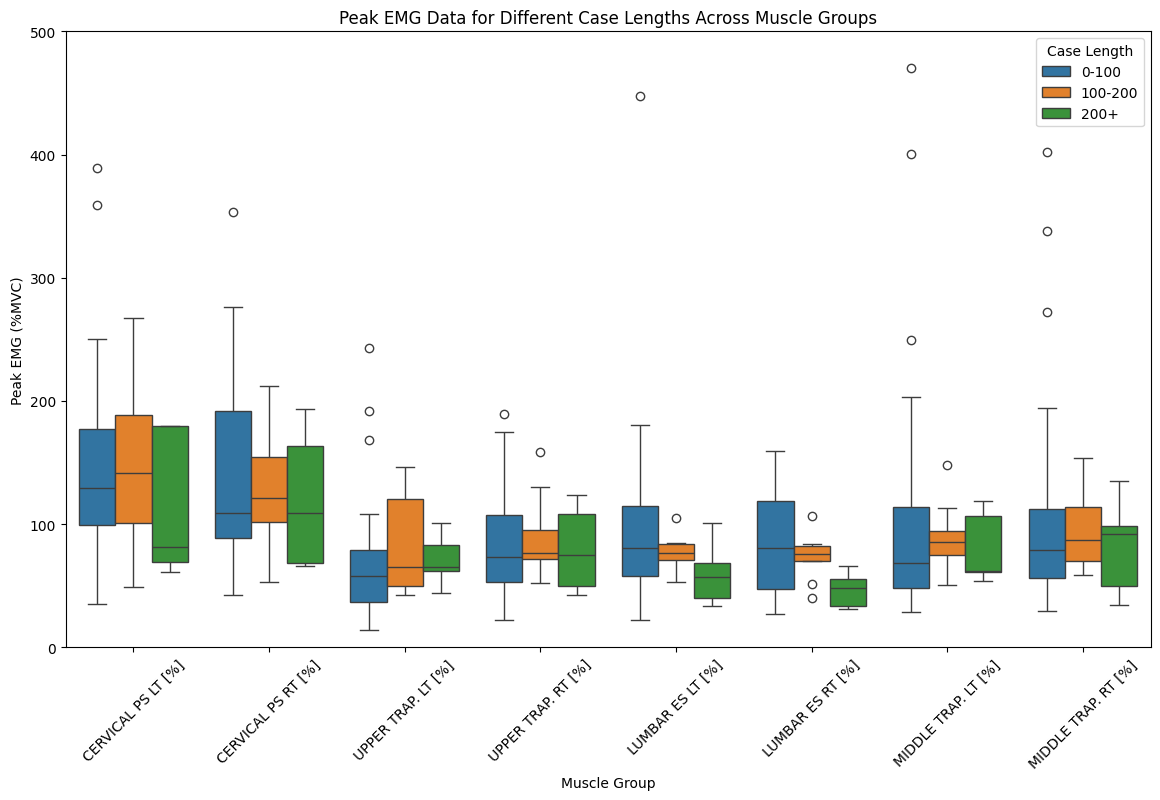

In [56]:
# Define the time bins
bins = [0, 100, 200, 600]
labels = ['0-100', '100-200', '200+']

# Create a new column for the time bins
merged_peak_data['Time_Bin'] = pd.cut(merged_peak_data['Total case length in minutes (first lidocaine injection - sheath removal)'], bins=bins, labels=labels, right=False)

# Filter the data for each time bin
peak_0_100 = merged_peak_data[merged_peak_data['Time_Bin'] == '0-100']
peak_100_200 = merged_peak_data[merged_peak_data['Time_Bin'] == '100-200']
peak_200_plus = merged_peak_data[merged_peak_data['Time_Bin'] == '200+']

# Combine the data for plotting
combined_data_peak = pd.concat([peak_0_100.assign(Time_Bin='0-100'), peak_100_200.assign(Time_Bin='100-200'), peak_200_plus.assign(Time_Bin='200+')])

# Melt the dataframe to long format for seaborn
melted_data_peak = combined_data_peak.melt(id_vars=['Participant ID', 'Time_Bin'], 
                                           value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                           var_name='Muscle Group', value_name='Peak EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Peak EMG (%MVC)', hue='Time_Bin', data=melted_data_peak)

plt.xlabel('Muscle Group')
plt.ylabel('Peak EMG (%MVC)')
plt.title('Peak EMG Data for Different Case Lengths Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Case Length')
plt.ylim(0, 500)
plt.show()

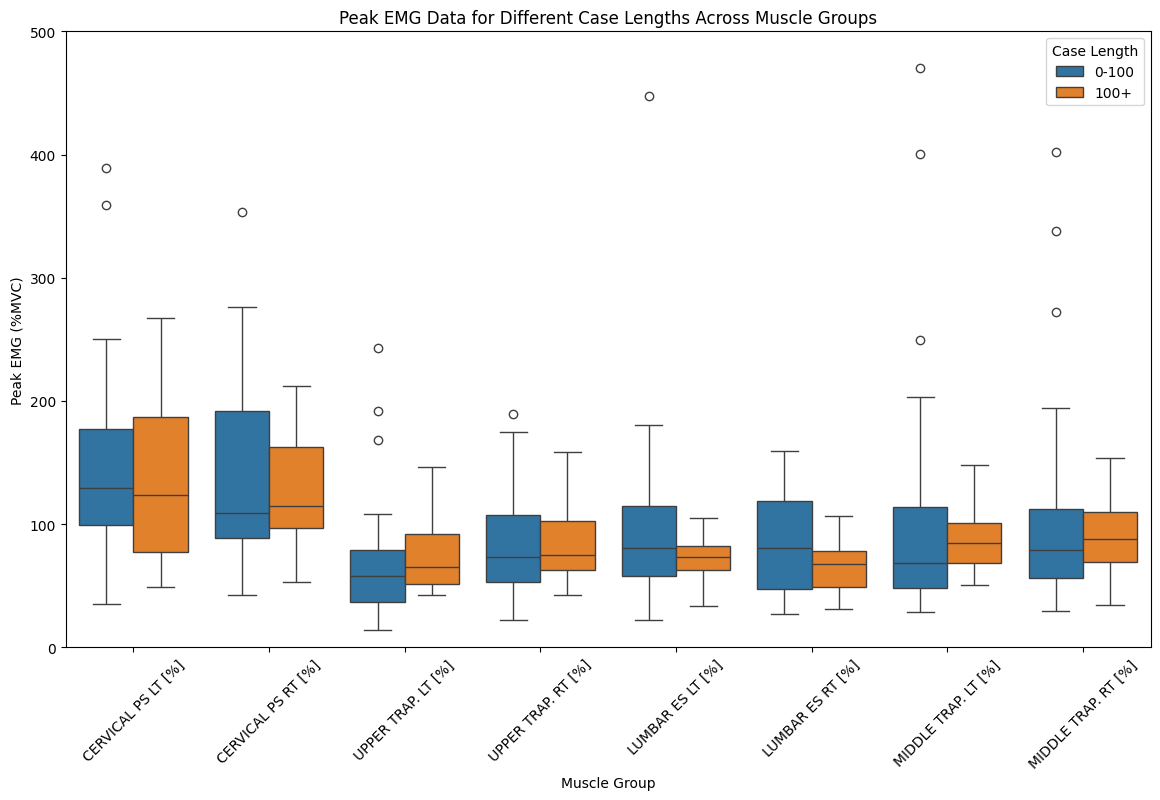

In [67]:
# Define the time bins
bins = [0, 100, 600]
labels = ['0-100', '100+']

# Create a new column for the time bins
merged_peak_data['Time_Bin'] = pd.cut(merged_peak_data['Total case length in minutes (first lidocaine injection - sheath removal)'], bins=bins, labels=labels, right=False)

# Filter the data for each time bin
peak_0_100 = merged_peak_data[merged_peak_data['Time_Bin'] == '0-100']
peak_100_plus = merged_peak_data[merged_peak_data['Time_Bin'] == '100+']

# Combine the data for plotting
combined_data_peak = pd.concat([peak_0_100.assign(Time_Bin='0-100'), peak_100_plus.assign(Time_Bin='100+')])

# Melt the dataframe to long format for seaborn
melted_data_peak = combined_data_peak.melt(id_vars=['Participant ID', 'Time_Bin'], 
                                           value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                           var_name='Muscle Group', value_name='Peak EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Peak EMG (%MVC)', hue='Time_Bin', data=melted_data_peak)

plt.xlabel('Muscle Group')
plt.ylabel('Peak EMG (%MVC)')
plt.title('Peak EMG Data for Different Case Lengths Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Case Length')
plt.ylim(0, 500)
plt.show()


In [61]:
# Separate the peak EMG data for different time bins
peak_emg_0_100 = merged_peak_data[merged_peak_data['Time_Bin'] == '0-100'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
peak_emg_100_200 = merged_peak_data[merged_peak_data['Time_Bin'] == '100-200'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
peak_emg_200_plus = merged_peak_data[merged_peak_data['Time_Bin'] == '200+'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group between different time bins
t_test_results_peak_time_bins = {}
for column in peak_emg_0_100.columns:
    t_stat_0_100_vs_100_200, p_value_0_100_vs_100_200 = ttest_ind(peak_emg_0_100[column], peak_emg_100_200[column], nan_policy='omit')
    t_stat_0_100_vs_200_plus, p_value_0_100_vs_200_plus = ttest_ind(peak_emg_0_100[column], peak_emg_200_plus[column], nan_policy='omit')
    t_stat_100_200_vs_200_plus, p_value_100_200_vs_200_plus = ttest_ind(peak_emg_100_200[column], peak_emg_200_plus[column], nan_policy='omit')
    
    t_test_results_peak_time_bins[column] = {
        '0-100 vs 100-200': {'t_stat': t_stat_0_100_vs_100_200, 'p_value': p_value_0_100_vs_100_200},
        '0-100 vs 200+': {'t_stat': t_stat_0_100_vs_200_plus, 'p_value': p_value_0_100_vs_200_plus},
        '100-200 vs 200+': {'t_stat': t_stat_100_200_vs_200_plus, 'p_value': p_value_100_200_vs_200_plus}
    }

# Display the results with p-values <= 0.05
for muscle, results in t_test_results_time_bins.items():
    for comparison, stats in results.items():
        if stats['p_value'] <= 0.05:
            print(f"{muscle} - {comparison}: t-statistic = {stats['t_stat']}, p-value = {stats['p_value']}")

In [68]:
# Separate the peak EMG data for different time bins
peak_emg_0_100 = merged_peak_data[merged_peak_data['Time_Bin'] == '0-100'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
peak_emg_100_plus = merged_peak_data[merged_peak_data['Time_Bin'] == '100+'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group between different time bins
t_test_results_peak_time_bins = {}
for column in peak_emg_0_100.columns:
    t_stat_0_100_vs_100_plus, p_value_0_100_vs_100_plus = ttest_ind(peak_emg_0_100[column], peak_emg_100_plus[column], nan_policy='omit')
    
    t_test_results_peak_time_bins[column] = {
        '0-100 vs 100+': {'t_stat': t_stat_0_100_vs_100_plus, 'p_value': p_value_0_100_vs_100_plus}
    }

# Display the results with p-values <= 0.05
for muscle, results in t_test_results_peak_time_bins.items():
    for comparison, stats in results.items():
        if stats['p_value'] <= 0.05:
            print(f"{muscle} - {comparison}: t-statistic = {stats['t_stat']}, p-value = {stats['p_value']}")


LUMBAR ES RT [%] - 0-100 vs 100+: t-statistic = 2.0228146336328545, p-value = 0.04815011030404902


Look at the variability data:

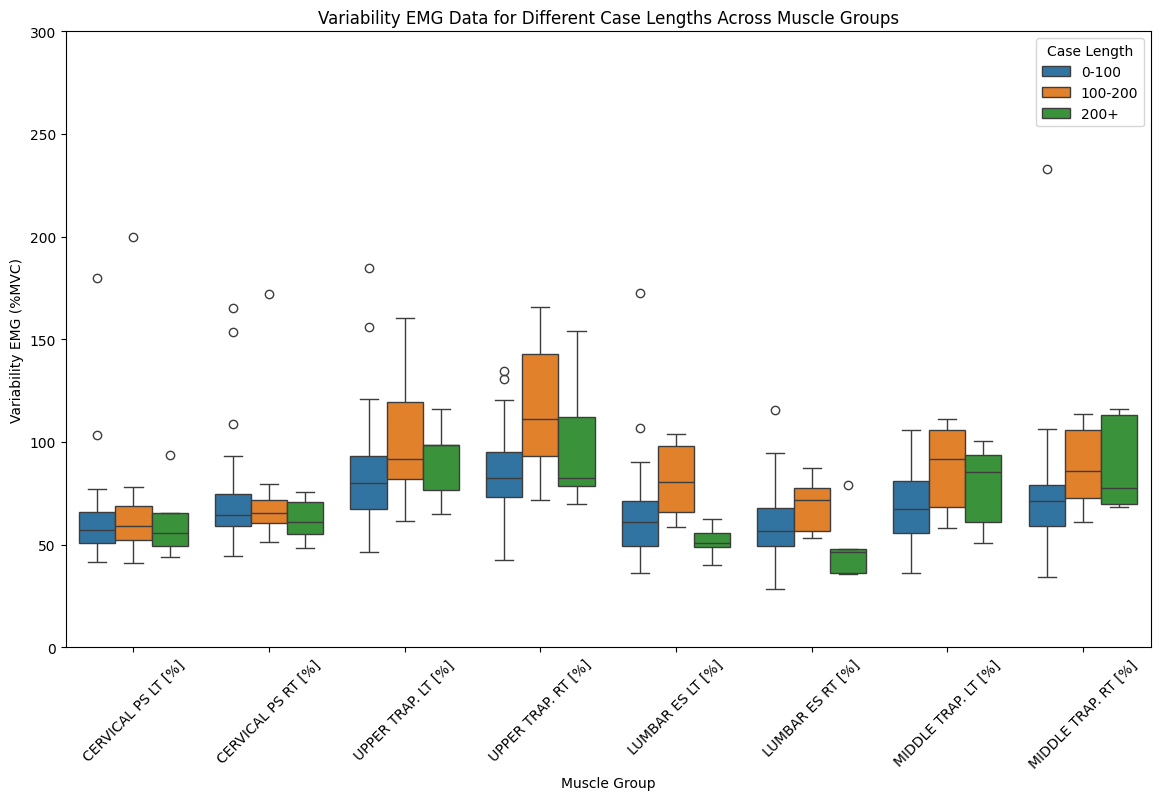

In [58]:
# Define the time bins
bins = [0, 100, 200, 600]
labels = ['0-100', '100-200', '200+']

# Create a new column for the time bins
merged_variability_data['Time_Bin'] = pd.cut(merged_variability_data['Total case length in minutes (first lidocaine injection - sheath removal)'], bins=bins, labels=labels, right=False)

# Filter the data for each time bin
variability_0_100 = merged_variability_data[merged_variability_data['Time_Bin'] == '0-100']
variability_100_200 = merged_variability_data[merged_variability_data['Time_Bin'] == '100-200']
variability_200_plus = merged_variability_data[merged_variability_data['Time_Bin'] == '200+']

# Combine the data for plotting
combined_data_variability = pd.concat([variability_0_100.assign(Time_Bin='0-100'), variability_100_200.assign(Time_Bin='100-200'), variability_200_plus.assign(Time_Bin='200+')])

# Melt the dataframe to long format for seaborn
melted_data_variability = combined_data_variability.melt(id_vars=['Participant ID', 'Time_Bin'], 
                                                         value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                                         var_name='Muscle Group', value_name='Variability EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Variability EMG (%MVC)', hue='Time_Bin', data=melted_data_variability)

plt.xlabel('Muscle Group')
plt.ylabel('Variability EMG (%MVC)')
plt.title('Variability EMG Data for Different Case Lengths Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Case Length')
plt.ylim(0, 300)
plt.show()

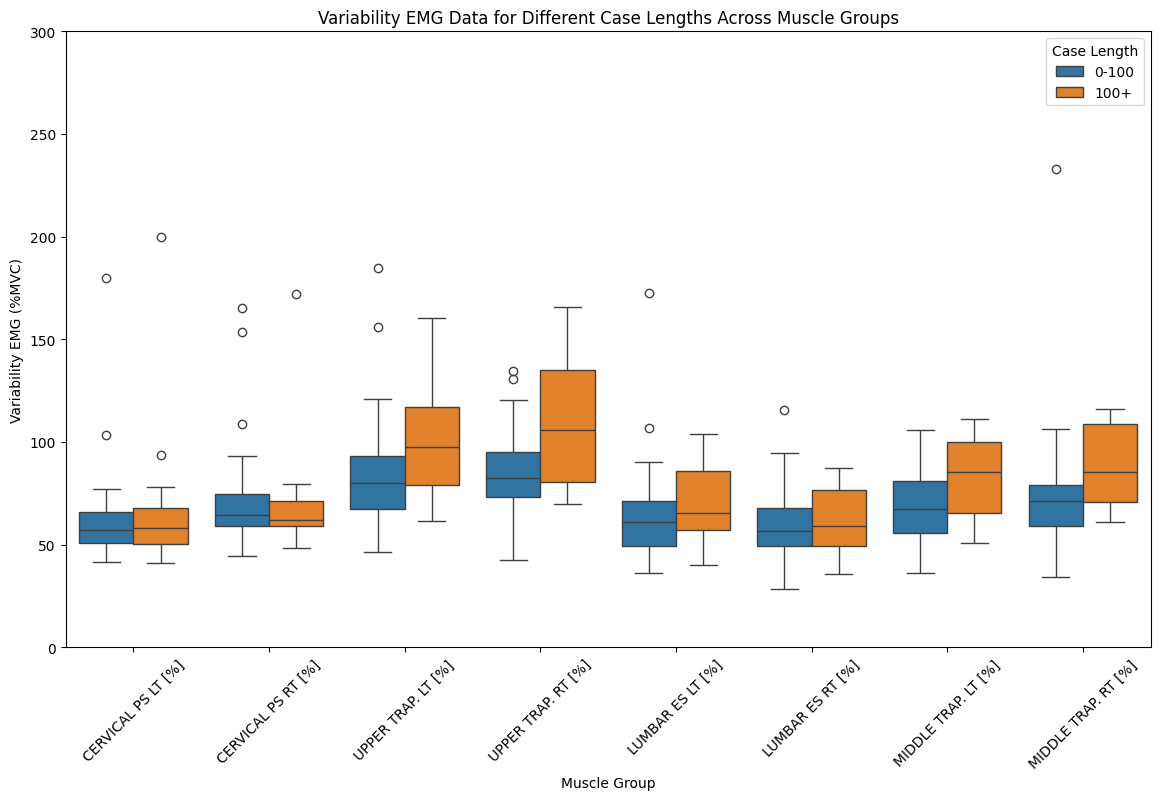

In [69]:
# Define the time bins
bins = [0, 100, 600]
labels = ['0-100', '100+']

# Create a new column for the time bins
merged_variability_data['Time_Bin'] = pd.cut(merged_variability_data['Total case length in minutes (first lidocaine injection - sheath removal)'], bins=bins, labels=labels, right=False)

# Filter the data for each time bin
variability_0_100 = merged_variability_data[merged_variability_data['Time_Bin'] == '0-100']
variability_100_plus = merged_variability_data[merged_variability_data['Time_Bin'] == '100+']

# Combine the data for plotting
combined_data_variability = pd.concat([variability_0_100.assign(Time_Bin='0-100'), variability_100_plus.assign(Time_Bin='100+')])

# Melt the dataframe to long format for seaborn
melted_data_variability = combined_data_variability.melt(id_vars=['Participant ID', 'Time_Bin'], 
                                                         value_vars=['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]'],
                                                         var_name='Muscle Group', value_name='Variability EMG (%MVC)')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Muscle Group', y='Variability EMG (%MVC)', hue='Time_Bin', data=melted_data_variability)

plt.xlabel('Muscle Group')
plt.ylabel('Variability EMG (%MVC)')
plt.title('Variability EMG Data for Different Case Lengths Across Muscle Groups')
plt.xticks(rotation=45)
plt.legend(title='Case Length')
plt.ylim(0, 300)
plt.show()


In [62]:
# Separate the variability EMG data for different time bins
variability_emg_0_100 = merged_variability_data[merged_variability_data['Time_Bin'] == '0-100'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
variability_emg_100_200 = merged_variability_data[merged_variability_data['Time_Bin'] == '100-200'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
variability_emg_200_plus = merged_variability_data[merged_variability_data['Time_Bin'] == '200+'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group between different time bins
t_test_results_variability_time_bins = {}
for column in variability_emg_0_100.columns:
    t_stat_0_100_vs_100_200, p_value_0_100_vs_100_200 = ttest_ind(variability_emg_0_100[column], variability_emg_100_200[column], nan_policy='omit')
    t_stat_0_100_vs_200_plus, p_value_0_100_vs_200_plus = ttest_ind(variability_emg_0_100[column], variability_emg_200_plus[column], nan_policy='omit')
    t_stat_100_200_vs_200_plus, p_value_100_200_vs_200_plus = ttest_ind(variability_emg_100_200[column], variability_emg_200_plus[column], nan_policy='omit')
    
    t_test_results_variability_time_bins[column] = {
        '0-100 vs 100-200': {'t_stat': t_stat_0_100_vs_100_200, 'p_value': p_value_0_100_vs_100_200},
        '0-100 vs 200+': {'t_stat': t_stat_0_100_vs_200_plus, 'p_value': p_value_0_100_vs_200_plus},
        '100-200 vs 200+': {'t_stat': t_stat_100_200_vs_200_plus, 'p_value': p_value_100_200_vs_200_plus}
    }

# Display the results with p-values <= 0.05
for muscle, results in t_test_results_time_bins.items():
    for comparison, stats in results.items():
        if stats['p_value'] <= 0.05:
            print(f"{muscle} - {comparison}: t-statistic = {stats['t_stat']}, p-value = {stats['p_value']}")

In [70]:
# Separate the variability EMG data for different time bins
variability_emg_0_100 = merged_variability_data[merged_variability_data['Time_Bin'] == '0-100'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]
variability_emg_100_plus = merged_variability_data[merged_variability_data['Time_Bin'] == '100+'][['CERVICAL PS LT [%]', 'CERVICAL PS RT [%]', 'UPPER TRAP. LT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES LT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. LT [%]', 'MIDDLE TRAP. RT [%]']]

# Perform t-test for each muscle group between different time bins
t_test_results_variability_time_bins = {}
for column in variability_emg_0_100.columns:
    t_stat_0_100_vs_100_plus, p_value_0_100_vs_100_plus = ttest_ind(variability_emg_0_100[column], variability_emg_100_plus[column], nan_policy='omit')
    
    t_test_results_variability_time_bins[column] = {
        '0-100 vs 100+': {'t_stat': t_stat_0_100_vs_100_plus, 'p_value': p_value_0_100_vs_100_plus}
    }

# Display the results with p-values <= 0.05
for muscle, results in t_test_results_variability_time_bins.items():
    for comparison, stats in results.items():
        if stats['p_value'] <= 0.05:
            print(f"{muscle} - {comparison}: t-statistic = {stats['t_stat']}, p-value = {stats['p_value']}")


UPPER TRAP. RT [%] - 0-100 vs 100+: t-statistic = -3.3305886411141077, p-value = 0.001567693601354899
MIDDLE TRAP. LT [%] - 0-100 vs 100+: t-statistic = -2.7927303568132458, p-value = 0.007214843230741036


# Concluding Results:

1. We didn't find many large statistically significant stratifications for the data. 
2. There were some observable differences in the values from the box plots though. 